In [1]:
import numpy as np
import pyintersection as pyi
import matplotlib.pyplot as plt

In [2]:
def getp1(n, t):
    par = np.array([1, 0, 0])
    offset = np.array([0, 1, 0]) # Perpendicular to par
    
    return offset * n + par * t

def getp2(n, t):
    par = np.array([0, 1, 1])
    offset = np.array([1, 0, 0]) # Perpendicular to par
    
    return offset * n + par * t

In [21]:
def round2pow(n):
    return int(n**0.5)

def get_points(n, t, getp, nwidth=0, twidth=0, points_count=10):
    size = round2pow(points_count)

    ts = np.linspace(t - twidth / 2, t + twidth / 2, size)
    ns = np.linspace(n - nwidth / 2, n + nwidth / 2, size)
    res = np.zeros((len(ns) * len(ts), 5))
    
    for i, n in enumerate(ns):
        for j, t in enumerate(ts):
            p = np.zeros((5,), dtype=float)
            p[0], p[1] = n, t
            p[2:] = getp(n, t)
            res[j + len(ts) * i] = p
    return res



In [26]:
def get_manifold_number(rpoint):
    return rpoint[1]

def get_rpoint_params(rpoint):
    return rpoint[2], rpoint[3]

# def generate_new_points(rpoints, nwidth=0, twidth=0, agen=None, bgen=None):
#     ares, bres = [], []
#     for rpoint in rpoints:
#         n, t = get_rpoint_params(rpoint)
#         manifold = get_manifold_number(rpoint)
        
#         if manifold == 0:
#             new_points = get_points(n, t, agen, nwidth=nwidth, twidth=twidth)
#             ares.append(new_points)
#         elif manifold == 1:
#             new_points = get_points(n, t, bgen, nwidth=nwidth, twidth=twidth)
#             bres.append(new_points)
#         else:
#             raise Exception("Wrong manifold number")
          
#     counter = 0
#     for nparr in ares:
#         for unarr in nparr:
#             counter += 1
#     ares = np.reshape(np.array(ares), (counter, 5))
            
#     counter = 0
#     for nparr in bres:
#         for unarr in nparr:
#             counter += 1
#     bres = np.reshape(np.array(bres), (counter, 5))
        
#     return ares, bres

def generate_new_points(rpoints, atol=None, agen=None, bgen=None):
    ares, bres = [], []
    for rpoint in rpoints:
        n, t = get_rpoint_params(rpoint)
        manifold = get_manifold_number(rpoint)
        
        if manifold == 0:
            new_points = agen(n, t, atol)
            ares.append(new_points)
        elif manifold == 1:
            new_points = bgen(n, t, atol)
            bres.append(new_points)
        else:
            raise Exception("Wrong manifold number")
          
    counter = 0
    for nparr in ares:
        for unarr in nparr:
            counter += 1
    ares = np.reshape(np.array(ares), (counter, 5))
            
    counter = 0
    for nparr in bres:
        for unarr in nparr:
            counter += 1
    bres = np.reshape(np.array(bres), (counter, 5))
        
    return ares, bres

In [27]:
#optimize3d(a, b, callback1, callback2, atol)

In [28]:
def ntbound(a, b):
    n_down = min(min(a[:, 0:1]), min(b[:, 0:1]))
    n_up = max(max(a[:, 0:1]), max(b[:, 0:1]))
    t_down = min(min(a[:, 1:2]), min(b[:, 1:2]))
    t_up = max(max(a[:, 1:2]), max(a[:, 1:2]))
    
    return n_down, n_up, t_down, t_up

# def optimize3d(a, b, target_atol=None, agen=None, bgen=None, loop=1):
#     n_down, n_up, t_down, t_up = ntbound(a, b)
#     nwidth, twidth = n_up - n_down, t_up - t_down
#     atol = max(pyi.get_boundary_cube3d(a, b))
#     for i in range(loop):
#         rcubes, rpoints, atols = pyi.intersect3d(a, b, atol=atol/2)
#         print(f'Iteration {i}: target_atols={atol/2} real_atols={max(atols)} rpoins={len(rpoints)} cubes={len(rcubes)}')
#         if max(atols) <= target_atol:
#             break
#         atol = max(atols)
#         a, b = generate_new_points(rpoints, agen=agen, bgen=bgen, nwidth=nwidth/(i**2+1), twidth=twidth/(i**2+1))
#     return rcubes, rpoints, atols

def optimize3d(a, b, target_atol=None, agen=None, bgen=None, loop=1):
    atol = max(pyi.get_boundary_cube3d(a, b))
    for i in range(loop):
        rcubes, rpoints, atols = pyi.intersect3d(a, b, atol=atol/2)
        print(f'Iteration {i}: target_atols={atol/2} real_atols={max(atols)} rpoins={len(rpoints)} cubes={len(rcubes)}')
        if max(atols) <= target_atol:
            break
        atol = max(atols)
        a, b = generate_new_points(rpoints, atol=atol, agen=agen, bgen=bgen)
    return rcubes, rpoints, atols

In [8]:
def plot_rpoints(axis, rpoints, c=None, s=None):
    ix, iy, iz = rpoints[:, 4:5], rpoints[:, 5:6], rpoints[:, 6:7]
    axis.scatter(ix, iy, iz, c=c, s=s)
    
def plot_mpoints(axis, mpoints, c=None, s=None):
    ix, iy, iz = mpoints[:, 2:3], mpoints[:, 3:4], mpoints[:, 4:5]
    axis.scatter(ix, iy, iz, c=c, s=s)

In [9]:
full_a = get_points(0, 0, getp1, nwidth=10, twidth=10, points_count=40)
full_b = get_points(0, 0, getp2, nwidth=10, twidth=10, points_count=40)

plot_mpoints(axis, full_b, s=10, c='g')
plot_mpoints(axis, full_a, s=10, c='b')

NameError: name 'axis' is not defined

In [ ]:
a = get_points(0, 0, getp1, 4, 4)
b = get_points(0, 0, getp2, 4, 4)
_, rpoints, _ = optimize3d(a, b, 0.1, agen=getp1, bgen=getp2, loop=4)
fig = plt.figure(figsize=(10, 10))
axis = fig.add_subplot(111, projection='3d')

plot_mpoints(axis, a, c='g', s=30)
plot_mpoints(axis, b, c='b', s=30)
plot_rpoints(axis, rpoints, c='deeppink', s=20)

In [10]:
def create_getp(vec_par, vec_offset):
    def _getp(n, t):
        return vec_offset * n + vec_par * t
    return _getp

### Generator for first "A" manifold
a_norm = np.array([1, 1, 1]) # Norm vector of the plane
a_par = np.array([2, -1, -1]) # Some orthogonal to norm vector
a_offset = np.array([0, 1, -1]) # One another orthogonal to previous other vectors
a_generator = get_gen(a_par, a_offset)

### Generator for second "B" manifold
b_norm = np.array([1, 0, 1]) # Norm vector of the plane
b_par = np.array([1, 0, -1]) # Some orthogonal to norm vector
b_offset = np.array([0, 1, 0]) # One another orthogonal to previous other vectors
b_generator = get_gen(b_par, b_offset)

testa = get_points(0, 0, a_generator, 8, 4, points_count=100)
testb = get_points(0, 0, b_generator, 8, 4, points_count=100)

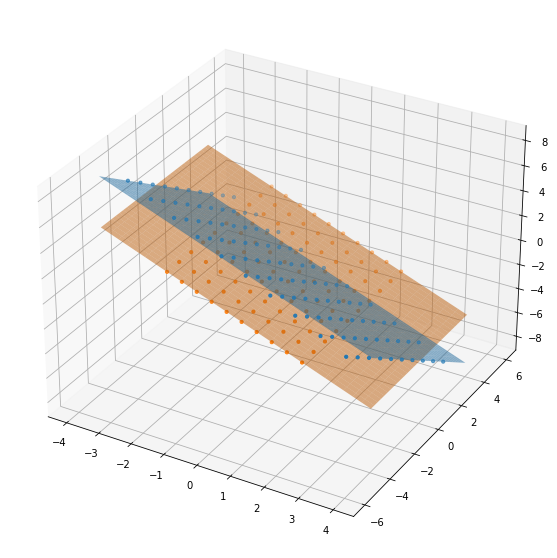

In [11]:
def make_xyz(n, D=0):
    L = 4
    W = 4
    kx = 31
    ky = 31
    
    n = n / np.linalg.norm(n)
    x, y = np.mgrid[-L:L:kx*1j, -W:W:ky*1j]
    A, B, C = n
    z = -(A*x+B*y+D)/C
    return (x, y, z)

n1 = np.array([1, 1, 1])
n2 = np.array([1, 0, 1])
ax, ay, az = make_xyz(a_norm)
bx, by, bz = make_xyz(b_norm)

fig = plt.figure(figsize=(10, 10))
axis = fig.add_subplot(111, projection='3d')
axis.plot_surface(ax, ay, az, alpha=0.5)
axis.plot_surface(bx, by, bz, alpha=0.5)

plot_mpoints(axis, testa, s=10)
plot_mpoints(axis, testb, s=10)

#_, rpoints, _ = optimize3d(testa, testb, 0.1, agen=a_generator, bgen=b_generator, loop=2)
#plot_rpoints(axis, rpoints, c='deeppink', s=20)

In [12]:
norm = np.array([1, 0, 1]) # Norm vector of the plane
par = np.array([1, 0, -1]) # Some orthogonal to norm vector
offset = np.array([0, 1, 0]) # One another orthogonal to previous other vectors
np.dot(norm, par), np.dot(norm, offset), np.dot(offset, par)

(0, 0, 0)

In [13]:
_ = np.array([0, 0, 0, 0, 0])

In [14]:
_ = 0, 0, *getp1(0, 0)

In [38]:
koef = 15

def generator_a(n, t, atol, points_count=10):
    size = round2pow(points_count)
    twidth = atol * koef
    nwidth = atol * koef
    ts = np.linspace(t - twidth / 2, t + twidth / 2, size)
    ns = np.linspace(n - nwidth / 2, n + nwidth / 2, size)
    res = np.zeros((len(ns) * len(ts), 5))
    
    for i, n in enumerate(ns):
        for j, t in enumerate(ts):
            res[j + len(ts) * i] = n, t, *getp1(n, t)
    return res

def generator_b(n, t, atol, points_count=10):
    size = round2pow(points_count)
    twidth = atol * koef
    nwidth = atol * koef
    ts = np.linspace(t - twidth / 2, t + twidth / 2, size)
    ns = np.linspace(n - nwidth / 2, n + nwidth / 2, size)
    res = np.zeros((len(ns) * len(ts), 5))
    
    for i, n in enumerate(ns):
        for j, t in enumerate(ts):
            res[j + len(ts) * i] = n, t, *getp2(n, t)
    return res

Iteration 0: target_atols=1.875 real_atols=1.875 rpoins=6 cubes=3
Iteration 1: target_atols=0.9375 real_atols=0.556640625 rpoins=18 cubes=9
Iteration 2: target_atols=0.2783203125 real_atols=0.17177581787109375 rpoins=54 cubes=27
Iteration 3: target_atols=0.08588790893554688 real_atols=0.04546020179986954 rpoins=162 cubes=81


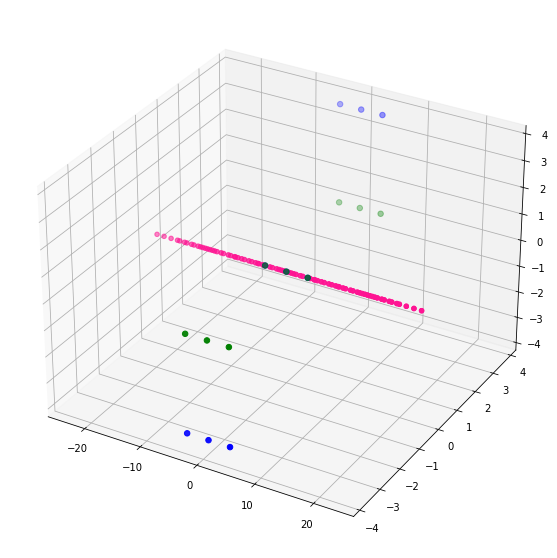

In [39]:
a = generator_a(0, 0, 0.5)
b = generator_b(0, 0, 0.5)
_, rpoints, _ = optimize3d(a, b, 0.1, generator_a, generator_b, loop=4)
fig = plt.figure(figsize=(10, 10))
axis = fig.add_subplot(111, projection='3d')

plot_mpoints(axis, a, c='g', s=30)
plot_mpoints(axis, b, c='b', s=30)
plot_rpoints(axis, rpoints, c='deeppink', s=20)